###  Importing Required Libraries

This cell loads all the essential Python libraries needed for data preprocessing, analysis, visualization, and modeling:

- **`pandas`** – For data manipulation and analysis.
- **`matplotlib.pyplot`** & **`seaborn`** – For data visualization.
- **`os`** & **`numpy`** – For system-level tasks and numerical operations.
- **`statsmodels.api`** & **`statsmodels.formula.api`** – For statistical modeling (e.g., OLS regression).
- **`IPython.display`** – Enhances output display in Jupyter notebooks.
- **`matplotlib.cm`** & **`matplotlib.colors`** – For customizing color maps in plots.
- **`dateutil.parser`** – Parses and handles datetime objects.
- **`sklearn` modules**:
  - `train_test_split` – Splits data into training and testing sets.
  - `LabelEncoder`, `OneHotEncoder`, `StandardScaler` – For encoding categorical features and scaling numeric features.
  - `LogisticRegression` – Implements logistic regression models.
  - `roc_auc_score`, `roc_curve` – For evaluating classification performance.
- **`scipy.sparse.hstack`** – Efficiently stacks sparse matrices, useful in high-dimensional feature spaces.
- **`imblearn.over_sampling.SMOTE`** – Applies SMOTE to address class imbalance by generating synthetic samples.
- **`collections.defaultdict`** – Creates dictionaries with default data types for flexible data grouping.

These libraries are foundational for building a data science pipeline that includes EDA, feature engineering, and predictive modeling.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import statsmodels.api as sm
import IPython.display as display
import matplotlib.cm as cm
import matplotlib.colors as mcolors

from statsmodels.formula.api import ols
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.sparse import hstack
from imblearn.over_sampling import SMOTE
from collections import defaultdict


### Reading and Cleaning Yearly CSV Files (2000–2004)

This code block performs the following operations for each CSV file from the years **2000 to 2004**:

1. **Generate file names** dynamically (`2000.csv`, `2001.csv`, ..., `2004.csv`).
2. **Read each file** using `UTF-8` encoding. If a `UnicodeDecodeError` occurs, it retries with `Latin-1` encoding.
3. **Filter columns**: Only keeps the relevant features required for analysis:
   - `Year`, `DayOfWeek`, `TailNum`, `ArrDelay`, `ArrTime`, `CRSArrTime`, `DepDelay`, `DepTime`, `CRSDepTime`
4. **Drop rows with missing values** using `dropna()` to ensure clean data.
5. **Save the cleaned dataset** to a new CSV file with the suffix `_Q2AB.csv` (e.g., `2000_Q2AB.csv`).

This process standardizes the datasets for further modeling and analysis across multiple years.


In [1]:
CSVs = [f"{year}.csv" for year in range(2000, 2005)]

for CSV in CSVs:
    try:
        print(f"Reading {CSV}...")

        # Try reading with UTF-8 first
        data = pd.read_csv(CSV, encoding="utf-8")
    
    except UnicodeDecodeError:
        print(f"Error decoding {CSV} with UTF-8, trying Latin-1...")
        data = pd.read_csv(CSV, encoding="latin1")

    # Keep only required columns
    Columns_Needed = ["Year", "DayOfWeek", "TailNum", "ArrDelay","ArrTime","CRSArrTime" ,"DepDelay","DepTime" ,"CRSDepTime"]
    Updated_data = data[Columns_Needed]
    
    # Drop missing values
    Updated_data = Updated_data.dropna()

    # Create new filename
    NewCSV = CSV.replace(".csv", "_Q2AB.csv")
    
    # Save cleaned data
    Updated_data.to_csv(NewCSV, index=False)

    print(f"Processed: {CSV} → Saved as {NewCSV}")

Reading 2000.csv...


NameError: name 'pd' is not defined

###  Combining Cleaned Yearly Flight Data (2000–2004)

This cell performs the following steps:

1. **Initializes a dictionary** `data_dict` to store DataFrames for each year.
2. **Iterates over the years 2000 to 2004**, checking if the corresponding cleaned CSV file (e.g., `2000_Q2AB.csv`) exists.
3. **Reads available files** into memory and stores them in the dictionary.
4. **Combines all available yearly DataFrames** into a single DataFrame called `combined_data` using `pd.concat()`.
5. **Saves the merged dataset** to a new file named `Combined_Flight_Data_2000_2004.csv`.

This combined dataset serves as the foundation for any further preprocessing, modeling, or exploratory data analysis across all five years.


In [9]:
years = range(2000, 2005)

# Dictionary to store DataFrames
data_dict = {}

# Read each CSV file
for year in years:
    file_name = f"{year}_Q2AB.csv"  
    # Check if file exists
    if os.path.exists(file_name): 
        print(f"Loading {file_name}...")
        data_dict[year] = pd.read_csv(file_name)
    else:
        print(f"File {file_name} not found!")

# Combine all DataFrames into one
if data_dict:
    combined_data = pd.concat(data_dict.values(), ignore_index=True)
    print("All files successfully loaded and combined!")
else:
    print("No files found.")

 # Create new CSV file for combined data from 2000 to 2004
combined_data.to_csv("Combined_Flight_Data_2000_2004.csv", index=False)
print("Combined data saved as 'Combined_Flight_Data_2000_2004.csv'")

Loading 2000_Q2AB.csv...
Loading 2001_Q2AB.csv...
Loading 2002_Q2AB.csv...
Loading 2003_Q2AB.csv...
Loading 2004_Q2AB.csv...
All files successfully loaded and combined!
Combined data saved as 'Combined_Flight_Data_2000_2004.csv'


###  Load Combined Flight Data

This step reads the merged CSV file `Combined_Flight_Data_2000_2004.csv` into a pandas DataFrame named `df`.  
This dataset includes cleaned flight records from the years **2000 to 2004**, prepared in the previous steps.

In [3]:
df = pd.read_csv("Combined_Flight_Data_2000_2004.csv")
print(df)


          Year  DayOfWeek TailNum  ArrDelay  ArrTime  CRSArrTime  DepDelay  \
0         2000          5  N808AW       7.0   1906.0        1859       0.0   
1         2000          6  N653AW      40.0   1939.0        1859       1.0   
2         2000          1  N806AW      -7.0   1852.0        1859      -2.0   
3         2000          6  N158AW      -4.0   1057.0        1101      -4.0   
4         2000          7  N656AW      47.0   1148.0        1101       3.0   
...        ...        ...     ...       ...      ...         ...       ...   
29766191  2004          4  N995DL      -1.0   1715.0        1716       6.0   
29766192  2004          4  N916DE      -1.0   1238.0        1239       6.0   
29766193  2004          4  N916DE       3.0   1507.0        1504       6.0   
29766194  2004          4  N990DL      -3.0    720.0         723      -2.0   
29766195  2004          4  N990DL     -13.0    955.0        1008      -2.0   

          DepTime  CRSDepTime  
0          1647.0        1647  

### Data Cleaning & Feature Formatting for Q2a

This section prepares a subset of the combined dataset for further analysis:

1. **Select Relevant Columns**: Keeps only the necessary columns:
   - `Year`, `CRSDepTime`, `DepDelay`, `ArrDelay`, `DayOfWeek`, `TailNum`

2. **Drop Duplicates**: Removes any exact duplicate rows to ensure data quality.

3. **Convert Day Numbers to Names**: Maps numeric values (1–7) in `DayOfWeek` to their corresponding weekday names (e.g., 1 → Monday).

4. **Format Scheduled Departure Time (`CRSDepTime`)**:
   - Pads values with zeros to always be 4 digits (e.g., 700 → 0700).
   - Converts to `datetime` format for easier time-based manipulation.
   - Re-formats the time to `HH:MM` (e.g., 07:00, 15:45).







In [ ]:
df_Q2a = df[['Year','CRSDepTime', 'DepDelay', 'ArrDelay','DayOfWeek','TailNum']]
day_mapping = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday"
}
# Drop duplicates 
df_Q2a=df_Q2a.drop_duplicates()

df_Q2a["DayOfWeek"] = df_Q2a["DayOfWeek"].map(day_mapping)# convert day of week from numbers to names
pd.options.display.float_format = '{:g}'.format #Display only whole numbers
df_Q2a['CRSDepTime'] = df_Q2a['CRSDepTime'].apply(lambda x: '{0:04}'.format(int(x)))
df_Q2a['CRSDepTime'] = pd.to_datetime(df_Q2a['CRSDepTime'], format='%H%M', errors='coerce')
#Time_period['CRSDepTime'] = pd.to_datetime(Time_period['CRSDepTime'], errors='coerce')
df_Q2a['CRSDepTime'] = df_Q2a['CRSDepTime'].dt.strftime('%H:%M')

print(f"Number of duplicate rows: {df_Q2a.duplicated().sum()}")
print(df_Q2a.head(5))

Number of duplicate rows: 0
   Year CRSDepTime  DepDelay  ArrDelay DayOfWeek TailNum
0  2000      16:47         0         7    Friday  N808AW
1  2000      16:47         1        40  Saturday  N653AW
2  2000      16:47        -2        -7    Monday  N806AW
3  2000      08:46        -4        -4  Saturday  N158AW
4  2000      08:46         3        47    Sunday  N656AW


### ⏱️ Calculating Total Delay

This step adds a new feature called **`TotalDelay`**, which combines both departure and arrival delays for each flight:

1. **Create `TotalDelay` column**:  
   Adds the values of `DepDelay` and `ArrDelay` for each row to capture the total delay per flight.

2. **Filter Non-Negative Delays**:  
   Retains only rows where `TotalDelay` is greater than or equal to 0. This removes any corrupted or unrealistic data entries where delay calculations may be negative.


In [5]:
#calculate total delay
df_Q2a['TotalDelay'] = df_Q2a['DepDelay'] + df_Q2a['ArrDelay']
df_Q2a = df_Q2a[df_Q2a['TotalDelay'] >= 0]
print(df_Q2a)

          Year CRSDepTime  DepDelay  ArrDelay DayOfWeek TailNum  TotalDelay
0         2000      16:47         0         7    Friday  N808AW           7
1         2000      16:47         1        40  Saturday  N653AW          41
4         2000      08:46         3        47    Sunday  N656AW          50
5         2000      08:46        -2        20    Monday  N803AW          18
6         2000      16:57         5         4  Saturday  N652AW           9
...        ...        ...       ...       ...       ...     ...         ...
29766182  2004      16:55        -3        13  Thursday  N948WP          10
29766188  2004      08:50        -1         6  Thursday  N948WP           5
29766191  2004      16:39         6        -1  Thursday  N995DL           5
29766192  2004      07:20         6        -1  Thursday  N916DE           5
29766193  2004      13:30         6         3  Thursday  N916DE           9

[13667385 rows x 7 columns]


### 🕒 Grouping Flights into Time Intervals (≈3 Hours)

This section groups scheduled departure times (`CRSDepTime`) into **3-hour intervals** for time-based analysis:

1. **Define `categorize_time_groups` function**:
   - Converts `CRSDepTime` (in `HH:MM` format) into total minutes since midnight.
   - Uses `pd.cut()` to bin these values into time intervals based on a user-defined duration (in minutes).
   - Labels the bins with integer group numbers starting from 1.

2. **Set Interval**:
   - The variable `Time_Interval_minutes` is set to `179` minutes (~2 hours and 59 minutes) to create consistent intervals throughout the day.

3. **Apply Time Grouping**:
   - A new column `TimeGroup` is added to `df_Q2a`, assigning each flight to a time group based on its scheduled departure time.

4. **Drop Any Remaining NaNs**:
   - Ensures the dataset remains clean by removing any rows with missing values.



In [6]:
# time group of 3 hour interval
def categorize_time_groups(depart_time, Time_Interval_minutes):  
    time_groups = pd.cut(                              
        pd.to_datetime(depart_time).dt.hour * 60 + pd.to_datetime(depart_time).dt.minute,
        bins=range(0, 1440, Time_Interval_minutes),  
        labels=False
    )
    return time_groups + 1  

Time_Interval_minutes = 179 

df_Q2a['TimeGroup'] = categorize_time_groups(df_Q2a['CRSDepTime'], Time_Interval_minutes)

df_Q2a = df_Q2a.dropna()

print(df_Q2a)

C:\Users\Kkohk\AppData\Local\Temp\ipykernel_19020\1301966678.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(depart_time).dt.hour * 60 + pd.to_datetime(depart_time).dt.minute,
C:\Users\Kkohk\AppData\Local\Temp\ipykernel_19020\1301966678.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(depart_time).dt.hour * 60 + pd.to_datetime(depart_time).dt.minute,


          Year CRSDepTime  DepDelay  ArrDelay DayOfWeek TailNum  TotalDelay  \
0         2000      16:47         0         7    Friday  N808AW           7   
1         2000      16:47         1        40  Saturday  N653AW          41   
4         2000      08:46         3        47    Sunday  N656AW          50   
5         2000      08:46        -2        20    Monday  N803AW          18   
6         2000      16:57         5         4  Saturday  N652AW           9   
...        ...        ...       ...       ...       ...     ...         ...   
29766182  2004      16:55        -3        13  Thursday  N948WP          10   
29766188  2004      08:50        -1         6  Thursday  N948WP           5   
29766191  2004      16:39         6        -1  Thursday  N995DL           5   
29766192  2004      07:20         6        -1  Thursday  N916DE           5   
29766193  2004      13:30         6         3  Thursday  N916DE           9   

          TimeGroup  
0                 6  
1      

### Creating Time Interval Labels

This step translates numeric `TimeGroup` values into **3-hour time intervals** 

1. **Define `generate_time_intervals` function**:
   - Converts a given `TimeGroup` number into a 3-hour interval string.
   - Example: `TimeGroup = 1` → `0000hrs-0259hrs`, `TimeGroup = 2` → `0300hrs-0559hrs`, etc.

2. **Apply to DataFrame**:
   - A new column, `TimeInterval`, is created by applying the function to the `TimeGroup` column.



In [7]:
#generate time interval of 3 hours
def generate_time_intervals(time_group):
    start_hour = int((time_group - 1) * 3)
    end_hour = start_hour + 2
    return f'{start_hour:02d}00hrs-{end_hour:02d}59hrs'

df_Q2a['TimeInterval'] = df_Q2a['TimeGroup'].apply(generate_time_intervals)

print(df_Q2a.head(50))

    Year CRSDepTime  DepDelay  ArrDelay  DayOfWeek TailNum  TotalDelay  \
0   2000      16:47         0         7     Friday  N808AW           7   
1   2000      16:47         1        40   Saturday  N653AW          41   
4   2000      08:46         3        47     Sunday  N656AW          50   
5   2000      08:46        -2        20     Monday  N803AW          18   
6   2000      16:57         5         4   Saturday  N652AW           9   
8   2000      16:57        -1        14     Monday  N807AW          13   
9   2000      19:32        23        37    Tuesday  N509DC          60   
13  2000      19:32        36        28     Sunday  N168AW          64   
17  2000      19:32        10         0   Thursday  N160AW          10   
19  2000      19:32        37         9     Sunday  N150AW          46   
20  2000      19:32        11        -5     Monday  N150AW           6   
21  2000      19:32         0         0    Tuesday  N168AW           0   
22  2000      19:32         3        1

### Heatmap: Average Total Delay by Time Interval and Day of Week

This section visualizes average flight delays across different times of day and weekdays:

1. **Sort Time Intervals**:
   - Ensures `TimeInterval` rows appear in logical reverse chronological order (from latest to earliest)

2. **Sort Days of the Week**:
   - Uses a custom order (`Monday` to `Sunday`) for consistent weekday sequencing.

3. **Create Pivot Table**:
   - Computes the mean `TotalDelay` grouped by both `TimeInterval` and `DayOfWeek`.

4. **Plot Heatmap**:
   - Uses `seaborn` to generate a heatmap of average delays.
   - The color scale (`coolwarm`) highlights areas of higher and lower delays.
   - Annotations display precise average delay values in each cell.

5. **Identify Extremes**:
   - Finds and prints the **lowest** and **highest** average delay values from the pivot table.
   - Displays the corresponding **day** and **time interval** for both extremes in a clean, readable format.

This visualization helps identify patterns in flight delays throughout the week and across different times of day — useful for uncovering peak congestion periods or operational inefficiencies.


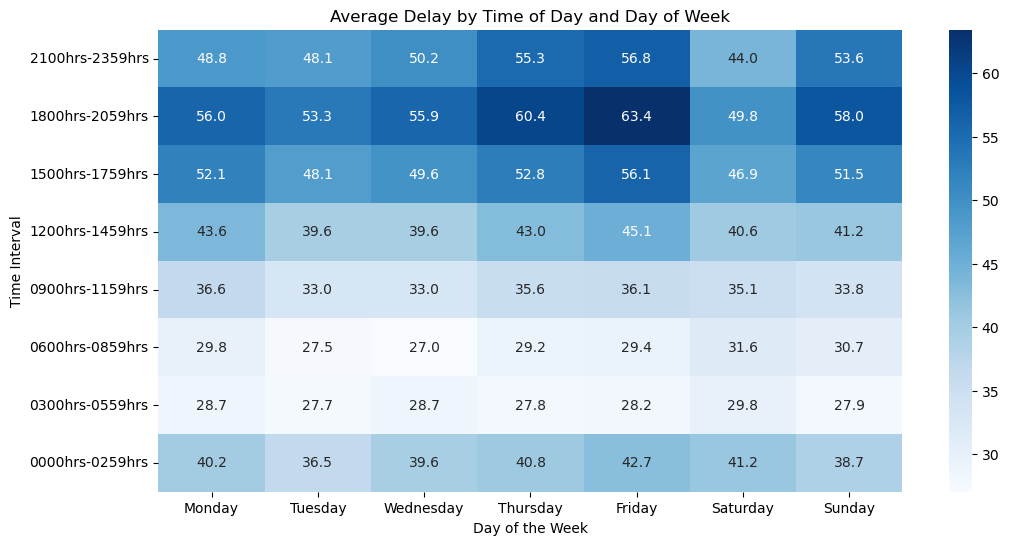


Least Delay:
   - Day: Wednesday
   - Time Interval: 0600hrs-0859hrs
   - Average Delay: 27.04 minutes

Longest Delay:
   - Day: Friday
   - Time Interval: 1800hrs-2059hrs
   - Average Delay: 63.44 minutes



In [18]:
# determine the correct order for time intervals
time_order = sorted(df_Q2a["TimeInterval"].unique(), key=lambda x: int(x.split("hrs-")[0]), reverse=True)

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create the pivot table
pivot_table = df_Q2a.pivot_table(values='TotalDelay', 
index='TimeInterval', columns='DayOfWeek', aggfunc='mean')

# Reindex rows (TimeInterval) and columns (DayOfWeek) dynamically
pivot_table = pivot_table.reindex(index=time_order, columns=day_order)

# Plot heatmap with corrected ordering
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt=".1f")

# Labels and title
plt.title("Average Delay by Time of Day and Day of Week")
plt.ylabel("Time Interval")
plt.xlabel("Day of the Week")
plt.xticks(rotation=0)
plt.show()

# Identify the lowest and highest mean delays from the heatmap data
min_delay_value = pivot_table.min().min()
max_delay_value = pivot_table.max().max()

# Locate the corresponding day and time interval for the lowest and highest mean delays
min_delay_location = pivot_table.stack().idxmin()
max_delay_location = pivot_table.stack().idxmax()

# Beautify the output with a formatted string
beautified_extreme_values = f"""
Least Delay:
   - Day: {min_delay_location[1]}
   - Time Interval: {min_delay_location[0]}
   - Average Delay: {min_delay_value:.2f} minutes

Longest Delay:
   - Day: {max_delay_location[1]}
   - Time Interval: {max_delay_location[0]}
   - Average Delay: {max_delay_value:.2f} minutes
"""

print(beautified_extreme_values)


### 📊 Average Flight Delay by Day of the Week (2000–2004)

This section analyzes how average total flight delays vary by **weekday** across the years **2000 to 2004**:

1. **Group & Aggregate**:
   - Calculates the mean `TotalDelay` for each combination of `Year` and `DayOfWeek`.

2. **Order Days**:
   - Applies a custom weekday order (`Monday` to `Sunday`) 

3. **Bar Plot**:
   - Visualizes average delays per day, separated by year using `seaborn.barplot()`.
   - Uses color-coded bars (`Set2` palette) for each weekday.
   - Annotates each bar with its respective delay in minutes.

4. **Delay Extremes by Year**:
   - Identifies the **least delayed** and **most delayed** weekdays **per year**.


5. **Display Summary Table**:
   - Presents the best and worst delay days for each year

This analysis reveals yearly weekday patterns 


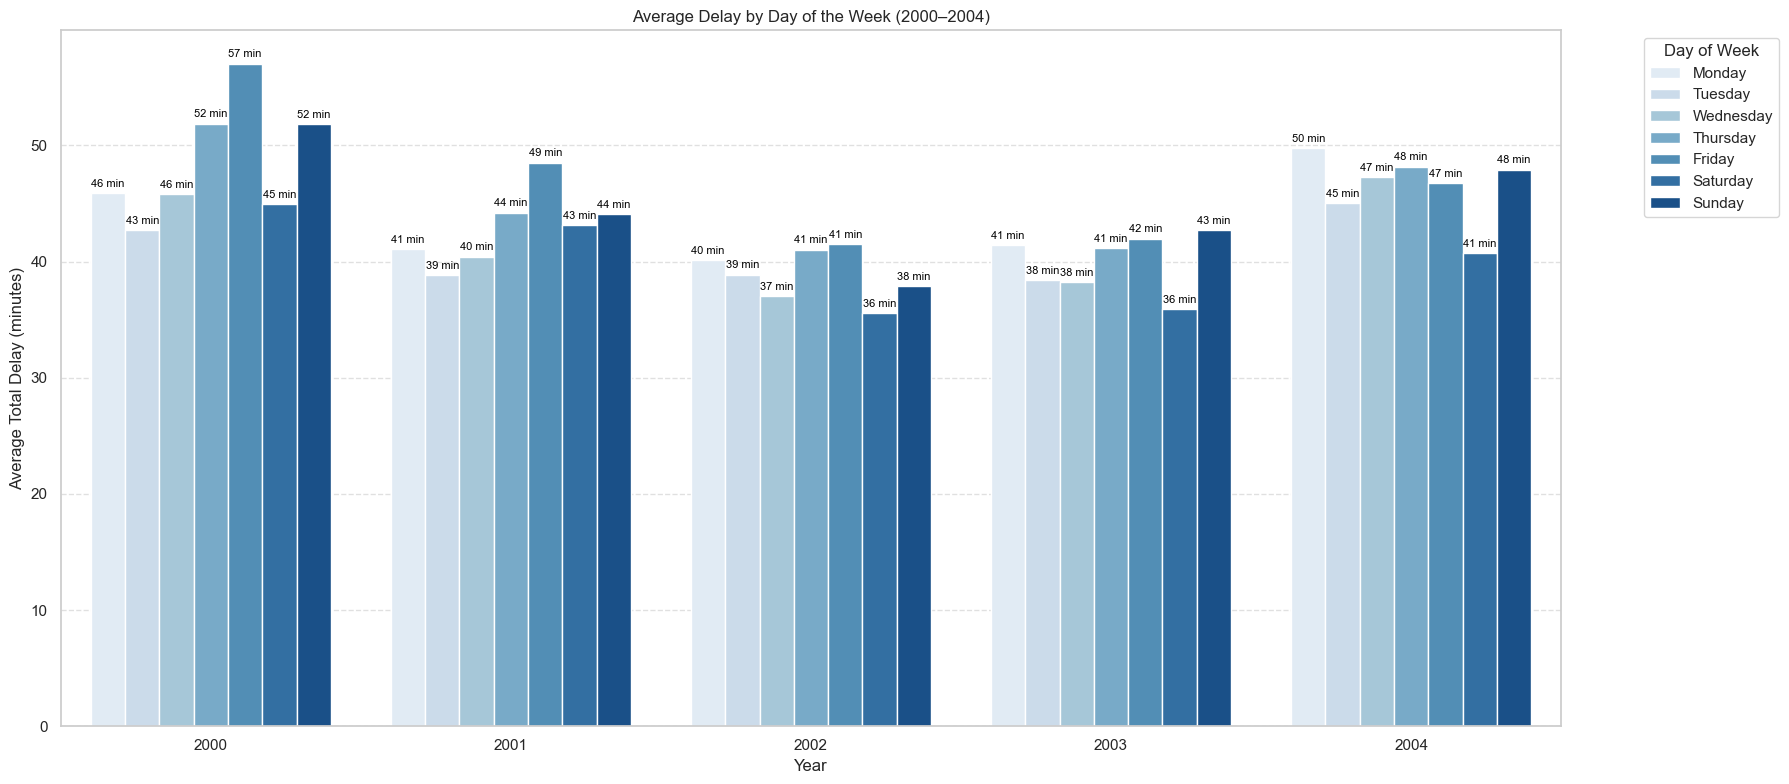

Year,DayOfWeek_LeastDelay,TotalDelay_LeastDelay,DayOfWeek_MostDelay,TotalDelay_MostDelay
2000,Tuesday,42 mins,Friday,57 mins
2001,Tuesday,38 mins,Friday,48 mins
2002,Saturday,35 mins,Friday,41 mins
2003,Saturday,35 mins,Sunday,42 mins
2004,Saturday,40 mins,Monday,49 mins


In [39]:

# Calculate average delay by Year and DayOfWeek
day_delay_by_year = df_Q2a.groupby(['Year', 'DayOfWeek'])['TotalDelay'].mean().reset_index()

# Define day order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_delay_by_year['DayOfWeek'] = pd.Categorical(day_delay_by_year['DayOfWeek'], categories=day_order, ordered=True)

# 🎨 Create a blue gradient palette for 7 days
# blues = cm.get_cmap('Blues', 7)  # 7 shades for 7 days
# blue_palette = [mcolors.rgb2hex(blues(i)) for i in range(blues.N)]

#plot
plt.figure(figsize=(18, 8))
ax = sns.barplot(
    x='Year', y='TotalDelay',
      hue='DayOfWeek', 
      data=day_delay_by_year, 
      palette='Blues')

for bar in ax.patches:
    height = bar.get_height()
    
    # Skip if height is 0 or NaN
    if height > 0 and not pd.isna(height):
        ax.annotate(f'{height:.0f} min',  # Label format
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=8, color='black', xytext=(0, 3),
                    textcoords='offset points')

plt.title('Average Delay by Day of the Week (2000–2004)')
plt.ylabel('Average Total Delay (minutes)')
plt.xlabel('Year')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

least_delay_days = day_delay_by_year.loc[day_delay_by_year.groupby('Year')['TotalDelay'].idxmin()]
most_delay_days = day_delay_by_year.loc[day_delay_by_year.groupby('Year')['TotalDelay'].idxmax()]

# Combine for summary
delay_summary = pd.merge(
    least_delay_days[['Year', 'DayOfWeek', 'TotalDelay']],
    most_delay_days[['Year', 'DayOfWeek', 'TotalDelay']],
    on='Year',
    suffixes=('_LeastDelay', '_MostDelay')
)

# Convert delay values to whole numbers
delay_summary['TotalDelay_LeastDelay'] = delay_summary['TotalDelay_LeastDelay'].astype(int).astype(str) + " mins"
delay_summary['TotalDelay_MostDelay'] = delay_summary['TotalDelay_MostDelay'].astype(int).astype(str) + " mins"

display.display(delay_summary.style.hide(axis="index"))


### Average Flight Delay by Time Interval (2000–2004)

This section explores how average flight delays vary across different **3-hour time intervals** over the years:

1. **Group & Aggregate**:
   - Calculates the mean `TotalDelay` for each combination of `Year` and `TimeInterval`.

2. **Sort Time Intervals**:
   - Adds a `TimeOrder` column by extracting the starting hour from `TimeInterval` labels (e.g., "0600hrs-0859hrs" → 6).
   - Sorts the data by `TimeOrder` to ensure time intervals appear in chronological order on the plot.

3. **Bar Plot**:
   - Uses a grouped bar chart to visualize how delays change across time intervals for each year.
   - Uses the `Set3` palette to distinguish time intervals by color.
   - Annotates bars with average delay values in minutes for clarity.

4. **Identify Delay Extremes**:
   - Finds the **least** and **most** delayed `TimeInterval` per year.
   - Merges the results into a summary table (`time_delay_summary`) showing extremes and formatted delay durations (e.g., "52 mins").

5. **Display Summary**:
   - Outputs the most and least delayed time intervals for each year in a neatly formatted table.



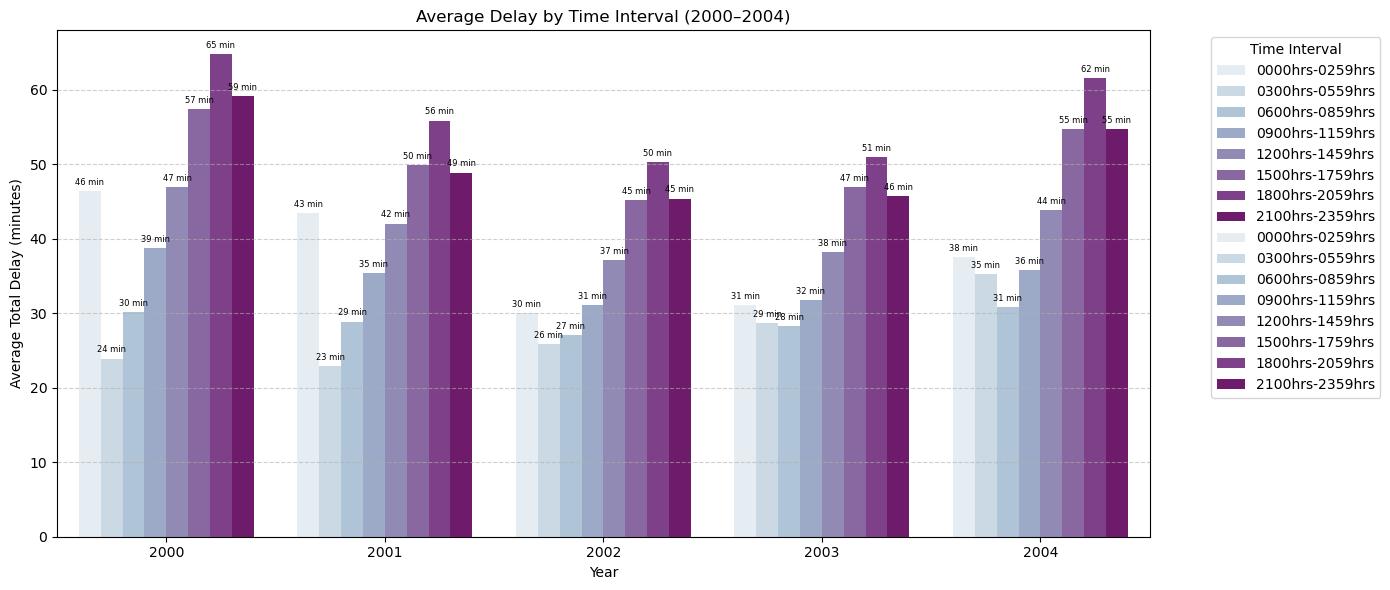

Year,TimeInterval_LeastDelay,TotalDelay_LeastDelay,TimeInterval_MostDelay,TotalDelay_MostDelay
2000,0300hrs-0559hrs,23 mins,1800hrs-2059hrs,64 mins
2001,0300hrs-0559hrs,22 mins,1800hrs-2059hrs,55 mins
2002,0300hrs-0559hrs,25 mins,1800hrs-2059hrs,50 mins
2003,0600hrs-0859hrs,28 mins,1800hrs-2059hrs,50 mins
2004,0600hrs-0859hrs,30 mins,1800hrs-2059hrs,61 mins


In [16]:
# Calculate average delay by Year and TimeInterval
time_delay_by_year = df_Q2a.groupby(['Year', 'TimeInterval'])['TotalDelay'].mean().reset_index()

# Sort time intervals correctly
time_delay_by_year['TimeOrder'] = time_delay_by_year['TimeInterval'].apply(lambda x: int(x.split("00hrs-")[0]))
time_delay_by_year = time_delay_by_year.sort_values('TimeOrder')

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    x='Year', y='TotalDelay',
      hue='TimeInterval', 
      data=time_delay_by_year, 
      palette='BuPu')
# Add labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0 and not pd.isna(height):  # Ensure valid labels
        ax.annotate(f'{height:.0f} min',  # Whole number + "mins"
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=6, color='black', xytext=(0, 3),
                    textcoords='offset points')
        
least_delay_times = time_delay_by_year.loc[time_delay_by_year.groupby('Year')['TotalDelay'].idxmin()]
most_delay_times = time_delay_by_year.loc[time_delay_by_year.groupby('Year')['TotalDelay'].idxmax()]

# Combine the results for summary
time_delay_summary = pd.merge(
    least_delay_times[['Year', 'TimeInterval', 'TotalDelay']],
    most_delay_times[['Year', 'TimeInterval', 'TotalDelay']],
    on='Year',
    suffixes=('_LeastDelay', '_MostDelay')
)

# Convert delay values to whole numbers and append "mins"
time_delay_summary['TotalDelay_LeastDelay'] = time_delay_summary['TotalDelay_LeastDelay'].astype(int).astype(str) + " mins"
time_delay_summary['TotalDelay_MostDelay'] = time_delay_summary['TotalDelay_MostDelay'].astype(int).astype(str) + " mins"



        
# Plot settings
sns.barplot(x='Year', y='TotalDelay', hue='TimeInterval', data=time_delay_by_year, palette='BuPu')
plt.title('Average Delay by Time Interval (2000–2004)')
plt.ylabel('Average Total Delay (minutes)')
plt.xlabel('Year')
plt.legend(title='Time Interval', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display the final summary
display.display(time_delay_summary.style.hide(axis="index"))

# Question 2b


### Preparing Aircraft Information for Delay Analysis (Q2b)

This section prepares the aircraft data to analyze delays in relation to the **aircraft's age**:

1. **Load Aircraft Metadata**:
   - Reads `plane-data.csv`, which contains aircraft registration details, including `tailnum` and `issue_date`.

2. **Select Relevant Columns**:
   - From the flight data (`df_Q2a`), extract `Year`, `TotalDelay`, and `TailNum`.
   - From the aircraft data (`df_plane`), keep `tailnum` and `issue_date`, and **drop rows where `issue_date` is missing**, as aircraft age cannot be determined without it.




### Extracting Aircraft Issue Dates for Age-Based Delay Analysis (Q2b)

1. **Read Aircraft Metadata**:
   - Loads `plane-data.csv`, which includes aircraft registration details.

2. **Extract Flight Delay Info**:
   - From the cleaned flight dataset (`df_Q2a`), selects:
     - `Year`: The flight year
     - `TotalDelay`: Combined arrival + departure delay
     - `TailNum`: Aircraft identifier (to match with registration info)



In [15]:
df_plane = pd.read_csv("plane-data.csv")
df_Q2b = df_Q2a[['Year','TotalDelay','TailNum']].copy()
df_plane_Q2b = df_plane[['tailnum', 'issue_date']].dropna(subset=['issue_date'])
print(df_Q2b)
print(df_plane_Q2b)


          Year  TotalDelay TailNum
0         2000           7  N808AW
1         2000          41  N653AW
4         2000          50  N656AW
5         2000          18  N803AW
6         2000           9  N652AW
...        ...         ...     ...
29766182  2004          10  N948WP
29766188  2004           5  N948WP
29766191  2004           5  N995DL
29766192  2004           5  N916DE
29766193  2004           9  N916DE

[13646113 rows x 3 columns]
     tailnum  issue_date
34    N10156  02/13/2004
35    N102UW  05/26/1999
36    N10323  07/01/1997
37    N103US  06/18/1999
38    N104UA  01/26/1998
...      ...         ...
5024  N997DL  03/11/1992
5025  N998AT  01/23/2003
5026  N998DL  04/02/1992
5027  N999CA  07/09/2008
5028  N999DN  04/02/1992

[4479 rows x 2 columns]


### Parsing Issue Dates and Deriving Aircraft Commission Year

This section prepares the aircraft dataset for age-based delay analysis by converting date strings and calculating the year each aircraft entered service:

1. **Parse `issue_date` Strings**:
   - Converts `issue_date` from string format to proper `datetime` objects using `dateutil.parser.parse`.
   - Skips values that are already parsed or labeled as `"None"`.

2. **Compute `YearOfCommission`**:
   - Exract the year from `issue_date` and store it in a new Column labeled as `YearofCommission`
.


In [16]:
df_plane_Q2b['issue_date'] = df_plane_Q2b['issue_date'].apply(lambda x: parse(x) if isinstance(x, str) and x != "None" else x)

df_plane_Q2b['YearOfCommission'] = df_plane_Q2b.apply(lambda row: row['issue_date'].year + 1 if row['issue_date'].month > 11 else row['issue_date'].year, axis=1)

df_plane_Q2b = df_plane_Q2b.rename(columns={'tailnum': 'TailNum'})

print(df_plane_Q2b)

     TailNum issue_date  YearOfCommission
34    N10156 2004-02-13              2004
35    N102UW 1999-05-26              1999
36    N10323 1997-07-01              1997
37    N103US 1999-06-18              1999
38    N104UA 1998-01-26              1998
...      ...        ...               ...
5024  N997DL 1992-03-11              1992
5025  N998AT 2003-01-23              2003
5026  N998DL 1992-04-02              1992
5027  N999CA 2008-07-09              2008
5028  N999DN 1992-04-02              1992

[4479 rows x 3 columns]



### Merging Flight Delays with Aircraft Commission Year

1. **Merge on `TailNum`**  
   - Join flight data with aircraft info using `TailNum`. Only keep rows with matching aircraft.

2. **Remove Duplicates**  
   - Drop any repeated rows after the merge to keep the data clean.


In [17]:
df_Q2b = pd.merge(df_Q2b, df_plane_Q2b, on='TailNum', how='inner')
df_Q2b=df_Q2b.drop_duplicates()
print(df_Q2b)

         Year  TotalDelay TailNum issue_date  YearOfCommission
0        2000           7  N808AW 2004-10-28              2004
1        2000          41  N653AW 2004-06-04              2004
2        2000          50  N656AW 2004-06-30              2004
3        2000          18  N803AW 2004-10-14              2004
4        2000           9  N652AW 2004-06-10              2004
...       ...         ...     ...        ...               ...
5507001  2004         161  N999DN 1992-04-02              1992
5507018  2004          79  N825MH 2000-12-15              2001
5507034  2004         320  N3731T 2000-10-02              2000
5507036  2004          37  N3741S 2001-01-30              2001
5507058  2004          95  N961DL 1990-06-19              1990

[1332640 rows x 5 columns]


### Calculating Aircraft Age at Time of Flight

We calculate how old each aircraft was during its flight:

1. **Age = Flight Year - Year of Commission**  
2. **Remove rows with negative age** (invalid data where a plane flew before it was built)




In [18]:
df_Q2b['Age'] = df_Q2b['Year'] - df_Q2b['YearOfCommission']
df_Q2b = df_Q2b[df_Q2b['Age'] >= 0]
print(df_Q2b)

         Year  TotalDelay TailNum issue_date  YearOfCommission  Age
15       2000         204  N624AW 1989-09-26              1989   11
17       2000          18  N633AW 1989-01-02              1989   11
19       2000         140  N633AW 1989-01-02              1989   11
20       2000          15  N634AW 1990-09-28              1990   10
21       2000           4  N620AW 1994-12-19              1995    5
...       ...         ...     ...        ...               ...  ...
5507001  2004         161  N999DN 1992-04-02              1992   12
5507018  2004          79  N825MH 2000-12-15              2001    3
5507034  2004         320  N3731T 2000-10-02              2000    4
5507036  2004          37  N3741S 2001-01-30              2001    3
5507058  2004          95  N961DL 1990-06-19              1990   14

[1071944 rows x 6 columns]


### Categorizing Aircraft by Age Group

This section groups aircraft into age-based categories for comparative analysis:

1. **Define Age Categories**:
   - **Young**: Aircraft less than 10 years old
   - **Middle**: Aircraft between 10 and 19 years old (inclusive of 10, exclusive of 20)
   - **Old**: Aircraft 20 years or older

2. **Create `Age_Category` Column**:
   - Uses `np.where()` to assign each flight to a corresponding age group based on the aircraft's calculated `Age`.

3. **Reset Index**:
   - Resets the DataFrame index to maintain clean, sequential indexing after filtering and transformation.



In [19]:
df_Q2b['Age_Category'] = np.where(df_Q2b['Age'] < 10, 'Young', np.where((df_Q2b['Age'] >= 10) & (df_Q2b['Age'] < 20), 'Middle', 'Old'))

df_Q2b = df_Q2b.reset_index(drop=True)

print(df_Q2b)

         Year  TotalDelay TailNum issue_date  YearOfCommission  Age  \
0        2000         204  N624AW 1989-09-26              1989   11   
1        2000          18  N633AW 1989-01-02              1989   11   
2        2000         140  N633AW 1989-01-02              1989   11   
3        2000          15  N634AW 1990-09-28              1990   10   
4        2000           4  N620AW 1994-12-19              1995    5   
...       ...         ...     ...        ...               ...  ...   
1071939  2004         161  N999DN 1992-04-02              1992   12   
1071940  2004          79  N825MH 2000-12-15              2001    3   
1071941  2004         320  N3731T 2000-10-02              2000    4   
1071942  2004          37  N3741S 2001-01-30              2001    3   
1071943  2004          95  N961DL 1990-06-19              1990   14   

        Age_Category  
0             Middle  
1             Middle  
2             Middle  
3             Middle  
4              Young  
...      

### Converting Delay to Minutes and Seconds Format

- **Function**: `convert_to_minutes_seconds(delay)`
- **Purpose**:
  - Takes a floating-point delay value (e.g., 12.75 minutes).
  - Converts the integer part to minutes.
  - Converts the decimal part to seconds (e.g., 0.75 × 60 = 45 seconds).
  - Returns the formatted string (e.g., `"12m 45s"`).
- **Handles Missing Values**:
  - If the input is `NaN`, the function returns `np.nan` to preserve compatibility with pandas workflows.

This is useful for displaying average delays in a more human-friendly time format during reporting or visualization.


In [ ]:
def convert_to_minutes_seconds(delay):
    if pd.isna(delay):  
        return np.nan   
    minutes = int(delay)
    seconds = round((delay - minutes) * 60)
    return f"{minutes}m {seconds}s"

## Data Preprocessing and Grouping by Year and Age Category

1. **Sorting the data**:
   We first sort the `df_Q2b` DataFrame by `Year` and `Age_Category`. This ensures that the data is ordered for each year and its corresponding age category, which helps in better grouping and analysis.

2. **Grouping the data**:
   We then group the data by `Year` and `Age_Category` and calculate the **mean of `TotalDelay`** for each group. This helps in understanding the average delay by age category for each year.

3. **Renaming the column**:
   The column `TotalDelay` is renamed to `Mean` to clarify that it contains the mean value of delays for each group.

4. **Formatting the mean value**:
   The mean values are then formatted into a **minute-second format** using a custom function `convert_to_minutes_seconds` that converts the mean delay from numeric values to a more readable time format (e.g., `5m 30s`).


In [2]:
df_Q2b = df_Q2b.sort_values(by=['Year', 'Age_Category'])

df_Q2b_grouped = df_Q2b.groupby(['Year', 'Age_Category'])['TotalDelay'].mean().reset_index()

df_Q2b_grouped = df_Q2b_grouped.rename(columns={'TotalDelay': 'Mean'})

df_Q2b_grouped['Mean_Formatted'] = df_Q2b_grouped['Mean'].apply(lambda x: convert_to_minutes_seconds(x) if not pd.isna(x) else np.nan)

print(df_Q2b_grouped)



NameError: name 'df_Q2b' is not defined

## Visualization: Annual Mean Delay by Age Category (2000-2004)

This section visualizes the **average delay** for each year (2000-2004) grouped by the **age category** (`Young`, `Middle`, and `Old`). We use a **bar plot** to showcase the comparison of the mean delays across age categories for each year. The key steps involved in creating the plot are:

1. **Color Customization**:
   - We define a color palette specifically for the age categories: `Young`, `Middle`, and `Old`.
   
2. **Plot Creation**:
   - We create a **bar plot** using `seaborn`, with `Year` on the x-axis and `Mean` on the y-axis, differentiating the bars by `Age_Category` using hues.

3. **Adding Labels**:
   - We annotate each bar with the **mean delay value** in minutes for clarity.

4. **Customization**:
   - We set the plot style to `whitegrid` for better visibility and make adjustments to the plot labels, title, and legend.



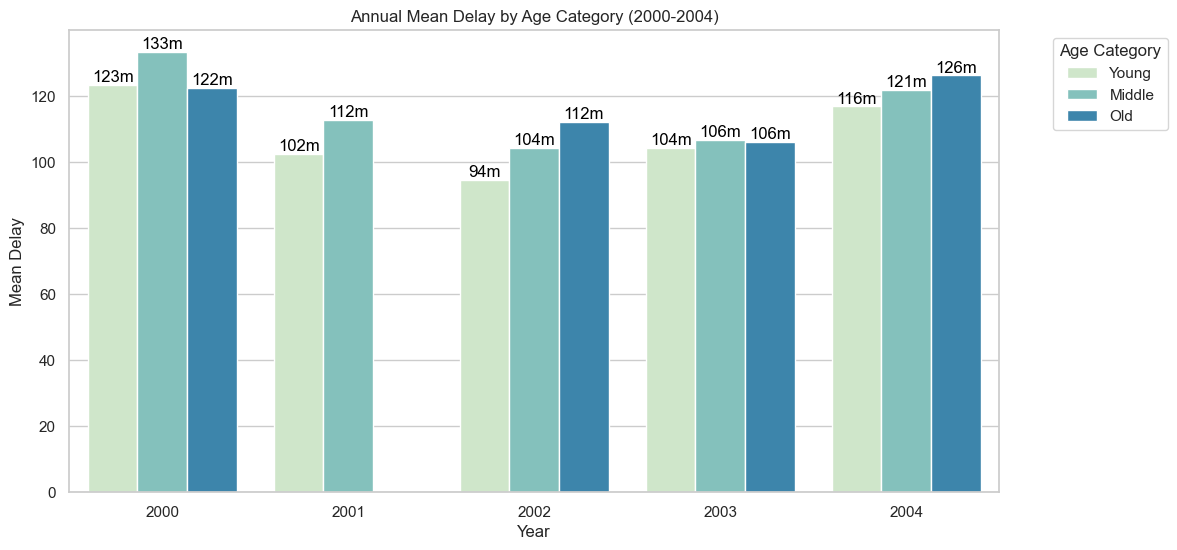

In [48]:
colors = {"Young": "#FF5733", "Middle": "#33FF57", "Old": "#3385FF"}

hue_order = ['Young', 'Middle', 'Old']

# df_Q2b_grouped1.loc[:, 'Mean'] = df_Q2b_grouped1['Mean'].fillna(0)
df_Q2b_grouped['Mean'] = pd.to_numeric(df_Q2b_grouped['Mean'], errors='coerce')
sns.set_palette(sns.color_palette(colors.values()))

plt.figure(figsize=(12, 6))
sns.barplot(data=df_Q2b_grouped, x='Year', y='Mean', hue='Age_Category', hue_order=hue_order, dodge=True,palette='GnBu')
sns.set(style='whitegrid')
plt.title("Annual Mean Delay by Age Category (2000-2004)")
plt.xlabel("Year")
plt.ylabel("Mean Delay")

for p in plt.gca().patches:
    height = p.get_height()
    if not np.isnan(height) and height > 0:
        minutes = int(height)
#        seconds = int((height - minutes) * 60)
        plt.gca().annotate(f'{minutes:02d}m', (p.get_x() + p.get_width() / 2, height),
                           ha='center', va='bottom', fontsize=12, color='black')

plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Display the statistical summary
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Statistical Summary of Delays by Age Category", dataframe=stats_summary)


## Analysis: Highest Mean Delay by Age Category (2000–2004)

This section identifies which **aircraft age category** (`Young`, `Middle`, or `Old`) experienced the **highest average delay** for each year from **2000 to 2004**. The analysis helps pinpoint which age groups of aircraft were most prone to delays during this period. The key steps in this process are:

1. **Mean Formatting**:
   - The raw mean delay values are transformed into a **minutes:seconds** format using a helper function (`convert_to_minutes_seconds`) for better interpretability.
   - Missing values (`NaN`) are safely handled by preserving them as `np.nan`.

2. **Identifying the Maximum Mean per Year**:
   - We iterate through each year from 2000 to 2004.
   - For each year:
     - The data is filtered to include only entries for that specific year.
     - The **row with the highest mean delay** is identified using `.idxmax()`.
     - The corresponding **age category** and **formatted mean value** are extracted and stored in a dictionary.

3. **Result Compilation**:
   - A dictionary (`highest_mean_by_year`) is created to store the results for each year, mapping the year to the age category with the highest mean delay and the value of that delay.

4. **Output Display**:
   - We loop through the results and print out each year, stating which age category had the highest average delay and what that delay was.

This analysis highlights yearly trends in performance based on aircraft age and can provide insights into operational inefficiencies or aging fleet issues.


In [23]:
df_Q2b_grouped['Mean_Formatted'] = df_Q2b_grouped['Mean'].apply(lambda x: convert_to_minutes_seconds(x) if not pd.isna(x) else np.nan)

highest_mean_by_year = {}

for year in range(2000, 2005):
    year_data = df_Q2b_grouped[df_Q2b_grouped['Year'] == year]
    highest_mean_row = year_data.loc[year_data['Mean'].idxmax()]
    highest_mean_category = highest_mean_row['Age_Category']
    highest_mean_value = highest_mean_row['Mean_Formatted']
    highest_mean_by_year[year] = {'Category': highest_mean_category, 'Mean': highest_mean_value}

for year, info in highest_mean_by_year.items():
    print(f"Year {year}: {info['Category']} has the highest mean delay of {info['Mean']}")

Year 2000: Middle has the highest mean delay of 133m 14s
Year 2001: Middle has the highest mean delay of 112m 37s
Year 2002: Old has the highest mean delay of 112m 10s
Year 2003: Middle has the highest mean delay of 106m 38s
Year 2004: Old has the highest mean delay of 126m 13s


## 🎯 Two-Way ANOVA: Effect of Year and Aircraft Age on Mean Delay

This analysis uses **Two-Way ANOVA** to evaluate how flight delays are influenced by two factors:  
- **Year** (from 2000 to 2004)  
- **Age_Category** (categorized as 'Young', 'Middle', or 'Old')  
Additionally, the interaction between these two variables is considered.



### 📌 Objective

To test whether:
1. Flight delays differ significantly **across years**.
2. Flight delays differ significantly **between aircraft age categories**.
3. There is a **combined effect (interaction)** between year and age category on delays.


In [24]:
model = ols('Mean ~ Year + Age_Category + Year:Age_Category', data=df_Q2b_grouped).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                   sum_sq  df        F   PR(>F)
Age_Category      211.835   2 0.670755 0.537888
Year              64.8672   1 0.410793  0.53949
Year:Age_Category 31.3683   2 0.099325 0.906547
Residual          1263.26   8      NaN      NaN


## Deleting Processed CSV Files (2000–2004)

1. **Generate File List**:
   - Uses a list comprehension to dynamically create filenames from 2000 to 2004 using the pattern `"{year}_Q2AB.csv"`.

2. **Prompt for User Confirmation**:
   - Prints the files that will be deleted.
   - Asks the user whether to proceed.
   - Accepts only `'y'` (yes) or `'n'` (no) input.
   - If the input is invalid, it repeats the prompt.

3. **Delete Files**:
   - If the user confirms deletion (`'y'`), the script iterates through the list:
     - Attempts to remove each file using `os.remove()`.
     - If the file does not exist, a `FileNotFoundError` is caught and handled with a message.
   - If the user declines (`'n'`), the script exits with a cancellation message.

4. **Print Completion Message**:
   - After all deletions are completed or canceled, the script prints a message indicating the status of the task.





In [25]:
CSVs = [f"{year}_Q2AB.csv" for year in range(2000, 2005)]

directory_path = os.getcwd()

print("Files to be deleted:")
for CSV in CSVs:
    print(CSV)

confirmation = input("Do you want to delete the following files? (Y/N): ").lower()

while confirmation != 'y':
    if confirmation == 'n':
        print("Deletion cancelled. Run the code again to delete. Thank you.")
        break
    else:
        confirmation = input("Invalid input. Please enter 'Y' or 'N': ").lower()

if confirmation == 'y':
    for CSV in CSVs:
        CSV_path = os.path.join(directory_path, CSV)
        try:
            os.remove(CSV_path)
            print(f"Deleted: {CSV}")
        except FileNotFoundError:
            print(f"File not found: {CSV}")

    print("Task completed! Cleaned files deleted.")

Files to be deleted:
2000_Q2AB.csv
2001_Q2AB.csv
2002_Q2AB.csv
2003_Q2AB.csv
2004_Q2AB.csv
Deletion cancelled. Run the code again to delete. Thank you.


# Question 2c
### Preprocessing Flight Data (2000–2004)

The following script processes raw flight data CSV files for the years **2000 to 2004**.

#### Steps Performed:

1. **File Looping**
   - Generates a list of filenames from `2000.csv` to `2004.csv`.

2. **Encoding Handling**
   - Attempts to read each file using **UTF-8** encoding.
   - If a `UnicodeDecodeError` occurs, retries with **Latin-1** encoding.

3. **Column Selection**
   - Only the following columns are retained:
     ```
     Month, DayofMonth, DayOfWeek, CRSDepTime, CRSArrTime,
     Distance, UniqueCarrier, Origin, Dest, TaxiOut, Year, Diverted
     ```

4. **Data Cleaning**
   - Removes any rows with **missing values** using `.dropna()`.

5. **File Saving**
   - Saves the cleaned dataset to a new file with the suffix **`_Q2C.csv`**
     (e.g., `2000_Q2C.csv`).

This preprocessing step ensures all datasets are cleaned, consistent, and ready for further modeling and analysis.


In [ ]:
CSVs = [str(year) + ".csv" for year in range(2000, 2005)]

for CSV in CSVs:
    try:
        print(f"Reading {CSV}...")

        # Try reading with UTF-8 first
        data = pd.read_csv(CSV, encoding="utf-8")
    
    except UnicodeDecodeError:
        print(f"Error decoding {CSV} with UTF-8, trying Latin-1...")
        data = pd.read_csv(CSV, encoding="latin1")
    
    Columns_Needed = ['Month', 'DayofMonth', 'DayOfWeek','CRSDepTime', 'CRSArrTime', 'Distance','UniqueCarrier', 'Origin', 'Dest','TaxiOut' ,'Year', 'Diverted']
    Updated_data = data[Columns_Needed]
    
    Updated_data = Updated_data.dropna()
    
    CSV_without_extension = CSV.replace(".csv", "")

    NewCSV = CSV_without_extension + "_Q2C.csv"
    Updated_data.to_csv(NewCSV, index=False)
    
    print("Processed:", CSV)

Reading 2000.csv...
Processed: 2000.csv
Reading 2001.csv...
Error decoding 2001.csv with UTF-8, trying Latin-1...
Processed: 2001.csv
Reading 2002.csv...
Error decoding 2002.csv with UTF-8, trying Latin-1...
Processed: 2002.csv
Reading 2003.csv...


C:\Users\Kkohk\AppData\Local\Temp\ipykernel_7644\144565508.py:8: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(CSV, encoding="utf-8")


Processed: 2003.csv
Reading 2004.csv...
Processed: 2004.csv


## Creating function `categorize_time`

To better capture time-based effects, we use a custom helper function called `categorize_time` to group times into broader and more interpretable bins:
- **Late Night** (00:00 – 05:59)
- **Morning** (06:00 – 11:59)
- **Afternoon** (12:00 – 17:59)
- **Evening** (18:00 – 23:59)



In [1]:
# Function to categorize time into bins
def categorize_time(hour):
    if 0 <= hour < 6:
        return "Late Night"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Evening"

### Function: `reduce_memory(df)`

This function is designed to optimize the memory usage of a DataFrame by downcasting numerical data types.

### Purpose:
The function iterates over all columns in the DataFrame that are of type `int64` or `float64`, and attempts to convert them to smaller, more memory-efficient numerical types using `pandas.to_numeric()` with the `downcast` parameter.

1. **Column Selection**:
   - `df.select_dtypes(include=['int64', 'float64']).columns`: This selects all columns in the DataFrame that are either 64-bit integers or 64-bit floats.

2. **Iteration and Downcasting**:
   - For each selected column, the function checks whether the column is of an integer type (`'int' in str(df[col].dtype)`).
   - If true, it applies `pd.to_numeric(df[col], downcast='integer')` to convert it to the smallest possible integer subtype (`int32`, `int16`, or `int8`), depending on the values.
   - Otherwise, it applies `pd.to_numeric(df[col], downcast='float')` to convert float64 to float32, if possible.

3. **Return Value**:
   - The modified DataFrame, now potentially using significantly less memory.


In [3]:
# reduce memory usage
def reduce_memory(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer' if 'int' in str(df[col].dtype) else 'float')
    return df

### Initialize Variables for Model Evaluation and Storage

- `all_y_true = []`  
  Initializes an empty list to store the true class labels (`0` or `1`) from the test set across all years. These will be used later to compute the overall AUC score.

- `all_y_prob = []`  
  Initializes an empty list to store predicted probabilities from the logistic regression model for each year. Used together with `all_y_true` to evaluate classifier performance over the full time span.

- `coefficients = []`  
  Initializes an empty list to collect the coefficient values from the trained logistic regression model for each year. These values are used for analyzing feature importance.

- `years_list = []`  
  Initializes an empty list to keep track of the year corresponding to each set of coefficients stored. Useful for plotting or tabulating trends over time.

- `all_data_2C = pd.DataFrame()`  
  Initializes an empty DataFrame that will store the cleaned and processed flight data for all years combined (2000–2004). This is useful for exploratory analysis or additional modeling after looping.


In [ ]:
all_y_true = []
all_y_prob = []
coefficients = []
years_list = []
all_data_2C = pd.DataFrame()

## Yearly Logistic Regression Modeling (2000–2004)

We run a `for` loop over the years 2000 to 2004 to train and evaluate a logistic regression model for each year. Here’s what happens in each iteration:

### 1. Load and Filter Data
- Read the CSV file for the current year.
- Filter rows to include only data from that year.

### 2. Prepare Features
- Select key features and define the target (`Diverted`).
- Drop rows with missing or duplicate values.

### 3. Create Time Categories
- Convert scheduled times into categories (e.g. morning, evening).
- Drop the original time columns.

### 4. Optimize and Clean
- Reduce memory usage.
- Keep only the top 10 busiest airports; others are grouped as `'Other'`.

### 5. Merge and Encode
- Add this year’s data to the combined dataset.
- One-hot encode categorical features.
- Combine them with numerical features.

### 6. Modeling Setup
- Split data into  80/20 train/test sets.
- Use SMOTE to balance the classes.
- Standardize numerical features.

### 7. Train and Evaluate
- Fit logistic regression.
- Calculate AUC score for the current year.
- Store predictions, scores, and model coefficients.

### 8. Analyze Feature Importance
- Group feature coefficients by type (e.g., `Origin`, `Month`).
- Print average importance for each feature group.

After all years are processed, calculate the **overall AUC score** using all predictions from 2000 to 2004.


In [ ]:


# Process each year's dataset
for year in range(2000, 2005):
    CSV_path = f"{year}_Q2C.csv"
    df_2C = pd.read_csv(CSV_path)

    # Filter for the current year
    df_2C_year = df_2C[df_2C['Year'] == year]

    # Define feature columns and target variable
    all_variable = ['Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance', 'UniqueCarrier', 'Origin', 'Dest', 'Year', 'Diverted']
    target_column = 'Diverted'

    # Drop missing values
    df_2C_year.dropna(subset=all_variable[:-2], inplace=True)
    df_2C_year.dropna(subset=[target_column], inplace=True)
    df_2C_year.drop_duplicates(keep='first', inplace=True)

    # Convert CRSDepTime & CRSArrTime into categorical time bins
    df_2C_year['DepTime_Category'] = df_2C_year['CRSDepTime'].apply(lambda x: categorize_time(int(str(int(x)).zfill(4)[:2])))
    df_2C_year['ArrTime_Category'] = df_2C_year['CRSArrTime'].apply(lambda x: categorize_time(int(str(int(x)).zfill(4)[:2])))
    
    # Drop original CRSDepTime and CRSArrTime
    df_2C_year.drop(columns=['CRSDepTime', 'CRSArrTime'], inplace=True)

    # Reduce memory usage
    df_2C_year = reduce_memory(df_2C_year)

    # Keep only the Top 10 busiest airports for Origin & Dest
    top_airports = df_2C_year['Origin'].value_counts().index[:10]
    df_2C_year['Origin'] = df_2C_year['Origin'].apply(lambda x: x if x in top_airports else 'Other')
    df_2C_year['Dest'] = df_2C_year['Dest'].apply(lambda x: x if x in top_airports else 'Other')

    all_data_2C = pd.concat([all_data_2C, df_2C_year], ignore_index=True)

    # One-Hot Encoding using Sparse Matrices
    categorical_columns = ['Month', 'DayofMonth', 'UniqueCarrier', 'Origin', 'Dest', 'DepTime_Category', 'ArrTime_Category']
    encoder = OneHotEncoder(sparse_output=True, drop='first', handle_unknown='ignore')
    X_categorical = encoder.fit_transform(df_2C_year[categorical_columns])
    X_numerical = df_2C_year[['DayOfWeek', 'Distance', 'TaxiOut']]

    # Combine Sparse and Numerical Data
    X_final = hstack((X_numerical, X_categorical))

    # Define target variable
    y = df_2C_year[target_column]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

    # Apply SMOTE to balance classes in the training set
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    # Standardize numerical features
    scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
    X_train_scaled = scaler.fit_transform(X_train_balanced)
    X_test_scaled = scaler.transform(X_test)

    # Train Logistic Regression
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(X_train_scaled, y_train_balanced)
    y_prob = classifier.predict_proba(X_test_scaled)[:, 1]
    year_auc = roc_auc_score(y_test, y_prob)
    all_y_true.extend(y_test)
    all_y_prob.extend(y_prob)

    print(f"\nAUC Score for Year {year}: {year_auc:.4f}")

    # Store coefficients
    coefficients.append(classifier.coef_[0])
    years_list.append(year)

# Create readable feature names
    numerical_features = X_numerical.columns.tolist()
    categorical_features = encoder.get_feature_names_out(categorical_columns).tolist()
    feature_names = numerical_features + categorical_features

# Print coefficients with names
    grouped_coefs = defaultdict(list)

    for name, coef in zip(feature_names, classifier.coef_[0]):
        base_feature = name.split('_')[0]
        grouped_coefs[base_feature].append(coef)

    

    # Print average coefficient per feature group
    print(f"Summarized Coefficients for {year}:")
    for feature, coefs in grouped_coefs.items():
        avg_coef = np.mean(coefs)
        print(f"{feature:<20} {avg_coef:.4f}")
    print()
    y_prob = classifier.predict_proba(X_test_scaled)[:, 1]
    all_y_true.extend(y_test)
    all_y_prob.extend(y_prob)

overall_auc = roc_auc_score(all_y_true, all_y_prob)
print(f"\n Overall AUC Score (2000–2004): {overall_auc:.4f}")


AUC Score for Year 2000: 0.6749
Summarized Coefficients for 2000:
DayOfWeek            0.0937
Distance             0.3602
TaxiOut              0.3514
Month                -0.0766
DayofMonth           -0.0354
UniqueCarrier        -0.0543
Origin               -0.0127
Dest                 0.0748
DepTime              -0.0372
ArrTime              0.0039


AUC Score for Year 2001: 0.6820
Summarized Coefficients for 2001:
DayOfWeek            -0.0186
Distance             0.3821
TaxiOut              0.2994
Month                0.0236
DayofMonth           0.0166
UniqueCarrier        -0.0508
Origin               0.0174
Dest                 0.0657
DepTime              -0.0564
ArrTime              0.0778


AUC Score for Year 2002: 0.6900
Summarized Coefficients for 2002:
DayOfWeek            -0.1060
Distance             0.3872
TaxiOut              0.2826
Month                0.0738
DayofMonth           0.0319
UniqueCarrier        0.0364
Origin               0.0222
Dest                 0.0628
DepT

### ROC Curve – How Good is Our Model?

After training the model, we use an **ROC Curve** to see how well it separates diverted vs. non-diverted flights.

#### What it Shows:
- A **blue curve** shows model performance.
- A **dashed line** shows random guessing.
- The more the curve bends to the **top-left**, the better the model.

This gives us a quick visual of how reliable the predictions are.



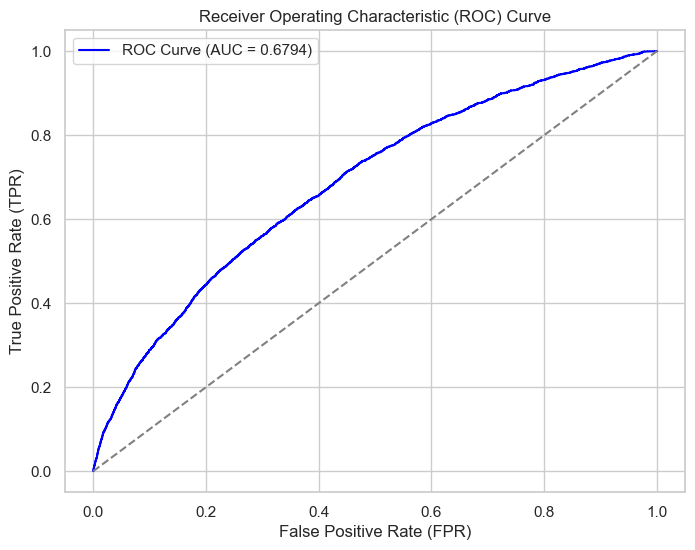

In [30]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {overall_auc:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random model line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

### Plotting Average Coefficients by Feature and Year

We analyze how important different groups of features (like `Origin`, `Month`, `Carrier`, etc.) were in predicting diversions over the years.

1. Convert model coefficients into a table, one row per year.
2. Reshape the data so each feature’s coefficient can be grouped.
3. Group similar features (e.g., all `Origin_` values under `Origin`).
4. Calculate the **average coefficient** for each group per year.
5. Plot a bar chart to show how each group influenced predictions.

#### Chart Meaning:
- **Higher bars** (positive) push predictions toward diversion.
- **Lower bars** (negative) push predictions away from diversion.
- This helps us see which types of information mattered most each year.

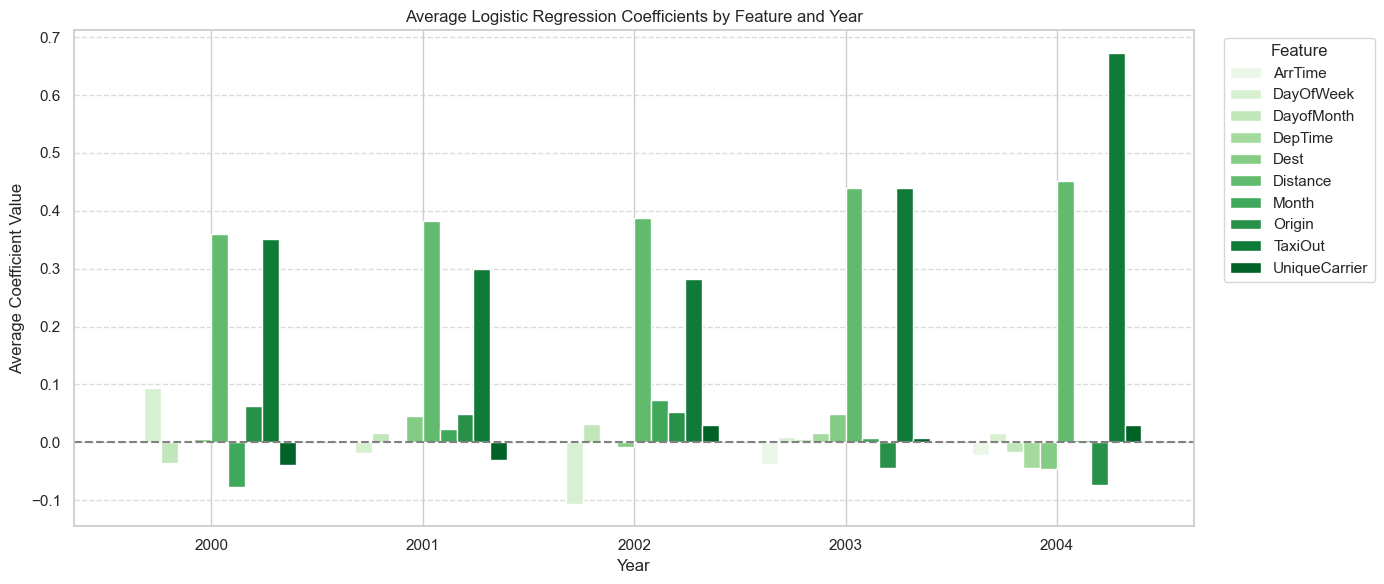

In [ ]:
# Convert the coefficients to a DataFrame
coefficients_df = pd.DataFrame(coefficients, columns=feature_names)
coefficients_df['Year'] = years_list

# Melt to long format
long_df = coefficients_df.melt(id_vars='Year', var_name='Feature', value_name='Coefficient')

# Group subfeatures into base feature names (like 'Origin', 'Month', etc.)
long_df['Base_Feature'] = long_df['Feature'].apply(lambda x: x.split('_')[0])

# Average coefficients across subfeatures per year
avg_df = long_df.groupby(['Year', 'Base_Feature'])['Coefficient'].mean().reset_index()

# Pivot for plotting — x-axis: Year, bars: Feature groups
pivot_df = avg_df.pivot(index='Year', columns='Base_Feature', values='Coefficient')

feature_list = pivot_df.columns.tolist()
colors = sns.color_palette("Greens", n_colors=len(feature_list))

# Plot grouped bar chart
pivot_df.plot(kind='bar', figsize=(14, 6), width=0.8, color= colors)

plt.title("Average Logistic Regression Coefficients by Feature and Year")
plt.xlabel("Year")
plt.ylabel("Average Coefficient Value")
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title="Feature", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Visualizing the Most Important Features (Year 2000 Example)

This plot helps us understand which features (like destination airports or flight info) had the **strongest influence** on predicting flight diversions in a specific year.

#### 1. Get Feature Names
- We combine the names of all features used in the model: both **numerical** ones (like `Distance`) and **categorical** ones (like destination airports) that were one-hot encoded.

#### 2. Pick a Year
- We choose one year to analyze, for example: `year_to_plot = 2000`.
- From that year’s model, we extract the **coefficients** (which show how important each feature was).


#### 3. Choose the Most Important Features
- We do two things:
  1. Pick the **Top 8 `Dest_` features** (which represent specific destination airports).
  2. Pick the **Top 10 strongest features overall**, based on how large their coefficient values are.
- We combine these into one list (removing duplicates) and **sort them** from least to most important.


#### 4. Add Color Based on Importance
- We apply a color scale so that the bars representing **more important features appear darker**.
- This makes the visual easier to interpret at a glance.


#### 5. Plot the Bar Chart
- We create a **horizontal bar chart** where:
  - Each bar is a feature.
  - The length shows **how strongly it affects the prediction**.
  - Positive values push the model toward predicting a diversion.
  - Negative values push it away from predicting a diversion.

- Labels are added next to each bar to show the exact coefficient value.

This chart helps us **quickly see which features mattered most** to the model in a specific year (like 2000).  
It’s especially helpful for understanding:
- Which destination airports had the strongest effect.

All this steps are repeated for the next few graphs from year 2000 to 2004

C:\Users\Kkohk\AppData\Local\Temp\ipykernel_7644\3650401045.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')  # or try 'plasma', 'viridis'


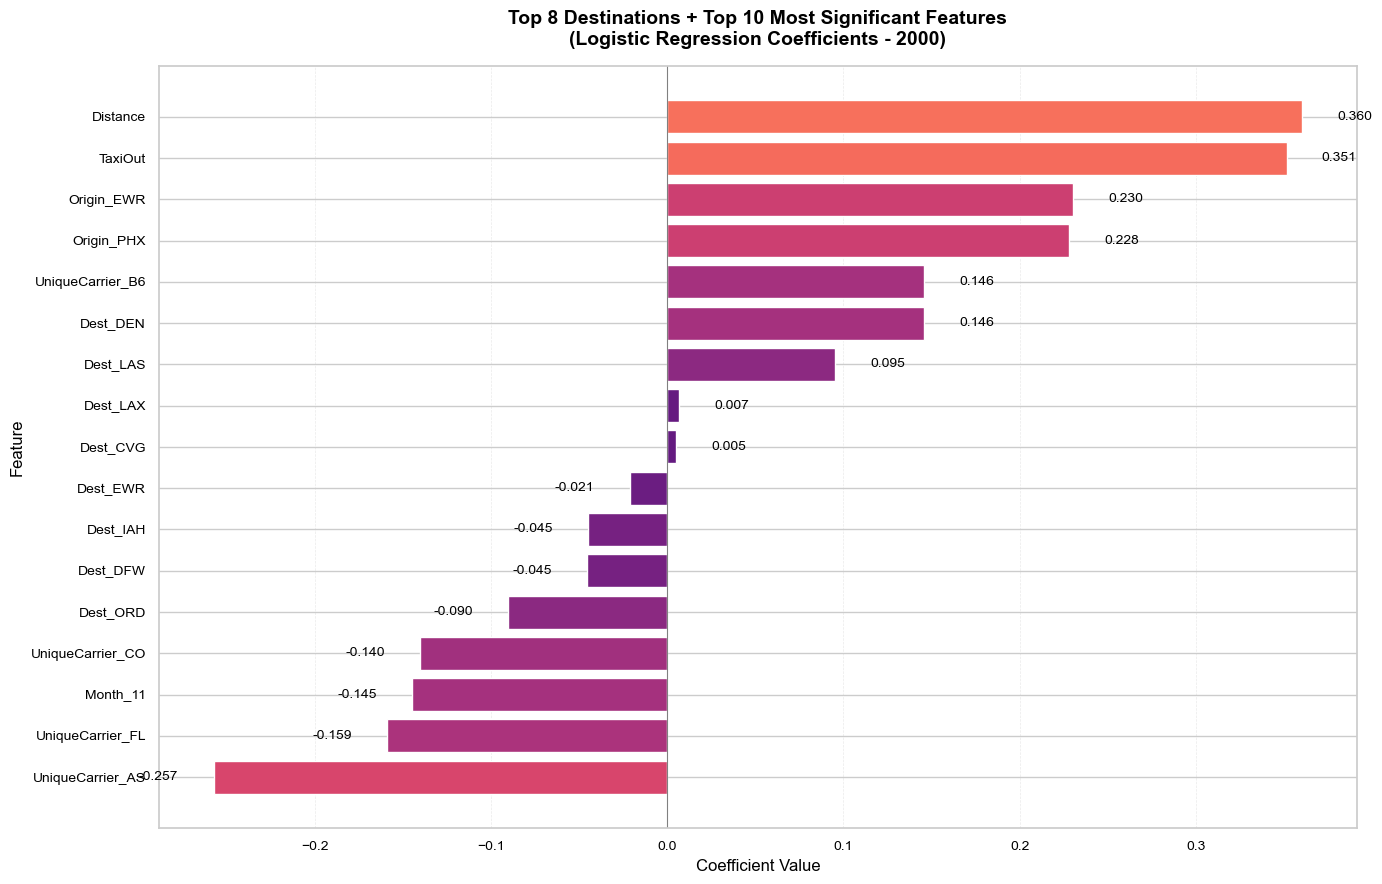

In [ ]:

# Feature name setup
categorical_feature_names = encoder.get_feature_names_out(categorical_columns)
feature_names = ['DayOfWeek', 'Distance', 'TaxiOut'] + list(categorical_feature_names)

# Coefficient DataFrame
coef_df = pd.DataFrame(coefficients, columns=feature_names, index=years_list)

# Year selection
year_to_plot = 2000
year_coefs = coef_df.loc[year_to_plot]

# Top 8 Dest features
dest_features = [f for f in year_coefs.index if f.startswith('Dest_')]
top8_dest = year_coefs[dest_features].abs().sort_values(ascending=False).head(8).index
top8_dest_values = year_coefs[top8_dest]

# Top 10 overall
top10_overall = year_coefs.abs().sort_values(ascending=False).head(10).index
top10_other_values = year_coefs[top10_overall]

# Combine and sort
combined_features = pd.concat([top8_dest_values, top10_other_values])
combined_features = combined_features[~combined_features.index.duplicated(keep='first')]
combined_features = combined_features.sort_values()

# Normalize and apply medium-dark gradient (30%–70%)
norm = mcolors.Normalize(vmin=combined_features.abs().min(), vmax=combined_features.abs().max())
cmap = cm.get_cmap('magma')  
colors = [cmap(0.3 + 0.4 * norm(abs(val))) for val in combined_features]

# Plot
plt.figure(figsize=(14, 9))
bars = plt.barh(combined_features.index, combined_features.values, color=colors)

# Labels
for bar in bars:
    width = bar.get_width()
    label_x = width + 0.02 if width >= 0 else width - 0.02
    ha = 'left' if width >= 0 else 'right'
    plt.text(label_x, bar.get_y() + bar.get_height() / 2,
             f'{width:.3f}', va='center', ha=ha, fontsize=10, color='black')

# Style
plt.title(f'Top 8 Destinations + Top 10 Most Significant Features\n(Logistic Regression Coefficients - {year_to_plot})',
          fontsize=14, fontweight='bold', pad=15, color='black')
plt.xlabel('Coefficient Value', fontsize=12, color='black')
plt.ylabel('Feature', fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.4)
plt.axvline(x=0, color='gray', linewidth=0.8)

# White background
plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

plt.tight_layout()
plt.show()

C:\Users\Kkohk\AppData\Local\Temp\ipykernel_7644\1625184779.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')


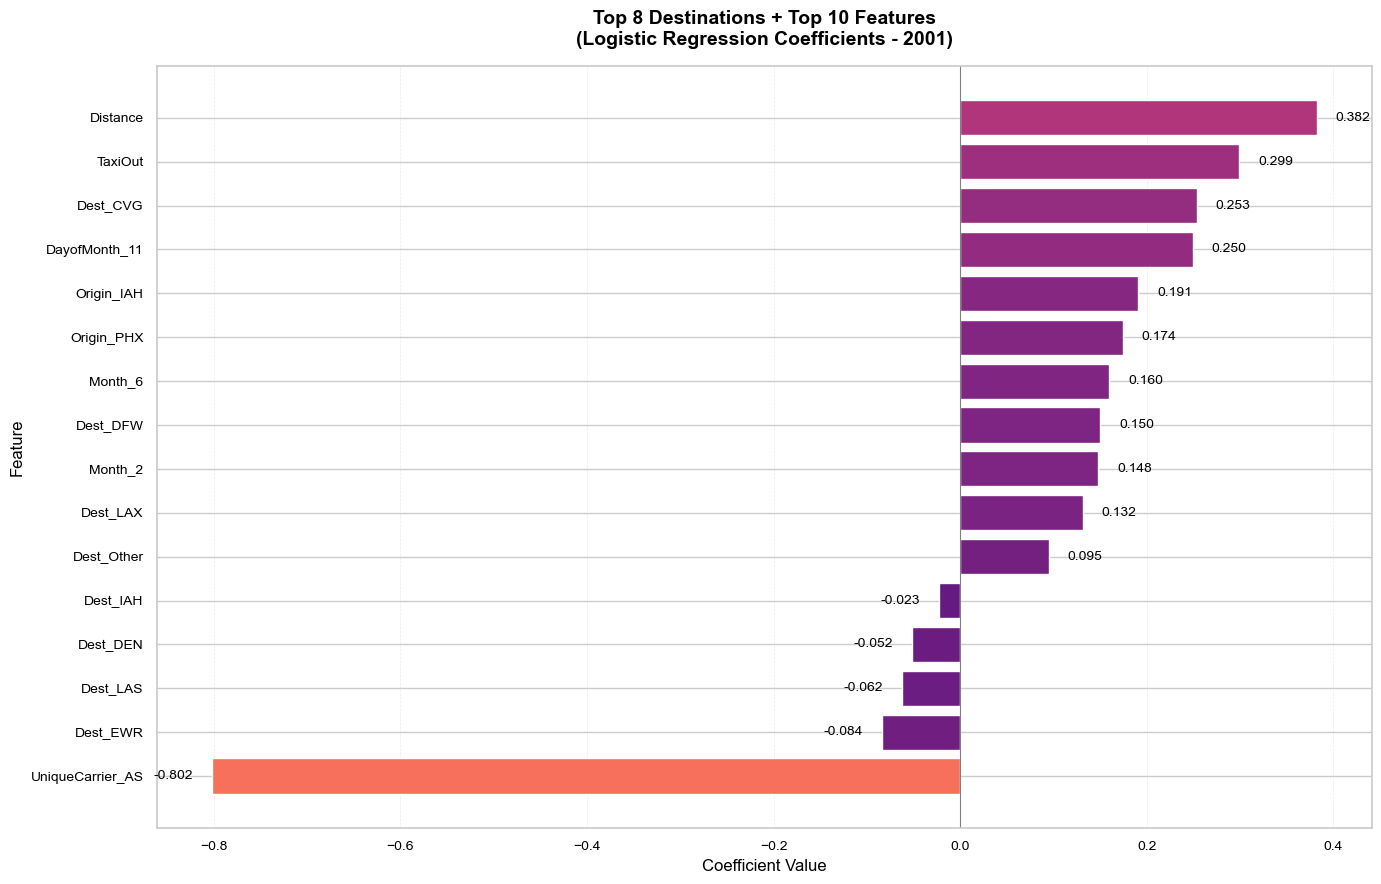

In [33]:
year_to_plot = 2001
year_coefs = coef_df.loc[year_to_plot]

dest_features = [f for f in year_coefs.index if f.startswith('Dest_')]
top8_dest = year_coefs[dest_features].abs().sort_values(ascending=False).head(8).index
top8_dest_values = year_coefs[top8_dest]

top10_overall = year_coefs.abs().sort_values(ascending=False).head(10).index
top10_other_values = year_coefs[top10_overall]

combined_features = pd.concat([top8_dest_values, top10_other_values])
combined_features = combined_features[~combined_features.index.duplicated(keep='first')]
combined_features = combined_features.sort_values()

norm = mcolors.Normalize(vmin=combined_features.abs().min(), vmax=combined_features.abs().max())
cmap = cm.get_cmap('magma')
colors = [cmap(0.3 + 0.4 * norm(abs(val))) for val in combined_features]

plt.figure(figsize=(14, 9))
bars = plt.barh(combined_features.index, combined_features.values, color=colors)

for bar in bars:
    width = bar.get_width()
    label_x = width + 0.02 if width >= 0 else width - 0.02
    ha = 'left' if width >= 0 else 'right'
    plt.text(label_x, bar.get_y() + bar.get_height() / 2, f'{width:.3f}', va='center', ha=ha, fontsize=10, color='black')

plt.title('Top 8 Destinations + Top 10 Features\n(Logistic Regression Coefficients - 2001)',
          fontsize=14, fontweight='bold', pad=15, color='black')
plt.xlabel('Coefficient Value', fontsize=12, color='black')
plt.ylabel('Feature', fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.4)
plt.axvline(x=0, color='gray', linewidth=0.8)
plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


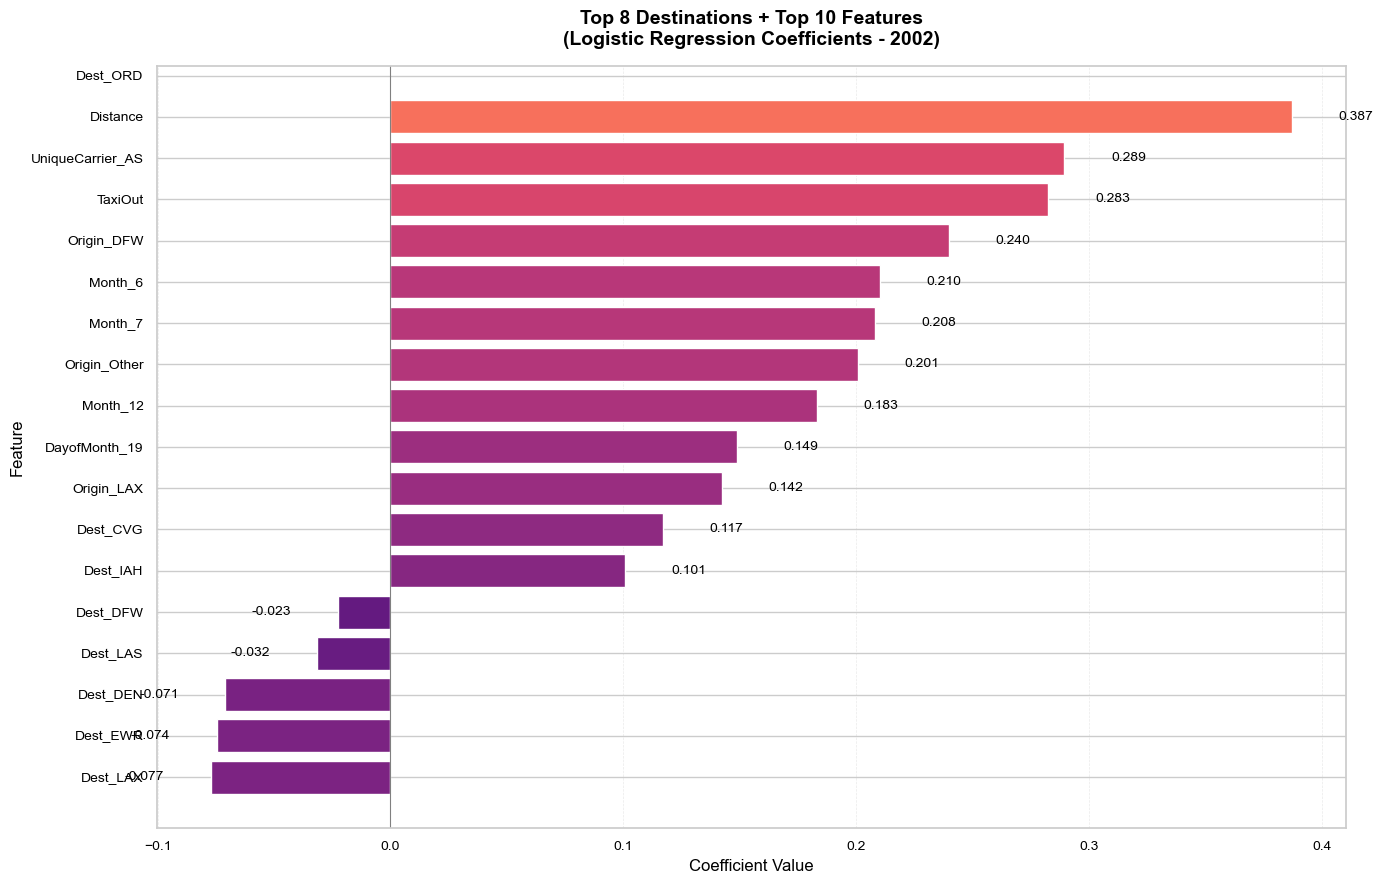

In [34]:
year_to_plot = 2002
year_coefs = coef_df.loc[year_to_plot]

dest_features = [f for f in year_coefs.index if f.startswith('Dest_')]
top8_dest = year_coefs[dest_features].abs().sort_values(ascending=False).head(8).index
top8_dest_values = year_coefs[top8_dest]

top10_overall = year_coefs.abs().sort_values(ascending=False).head(10).index
top10_other_values = year_coefs[top10_overall]

combined_features = pd.concat([top8_dest_values, top10_other_values])
combined_features = combined_features[~combined_features.index.duplicated(keep='first')]
combined_features = combined_features.sort_values()

norm = mcolors.Normalize(vmin=combined_features.abs().min(), vmax=combined_features.abs().max())
colors = [cmap(0.3 + 0.4 * norm(abs(val))) for val in combined_features]

plt.figure(figsize=(14, 9))
bars = plt.barh(combined_features.index, combined_features.values, color=colors)

for bar in bars:
    width = bar.get_width()
    label_x = width + 0.02 if width >= 0 else width - 0.02
    ha = 'left' if width >= 0 else 'right'
    plt.text(label_x, bar.get_y() + bar.get_height() / 2, f'{width:.3f}', va='center', ha=ha, fontsize=10, color='black')

plt.title('Top 8 Destinations + Top 10 Features\n(Logistic Regression Coefficients - 2002)',
          fontsize=14, fontweight='bold', pad=15, color='black')
plt.xlabel('Coefficient Value', fontsize=12, color='black')
plt.ylabel('Feature', fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.4)
plt.axvline(x=0, color='gray', linewidth=0.8)
plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.show()

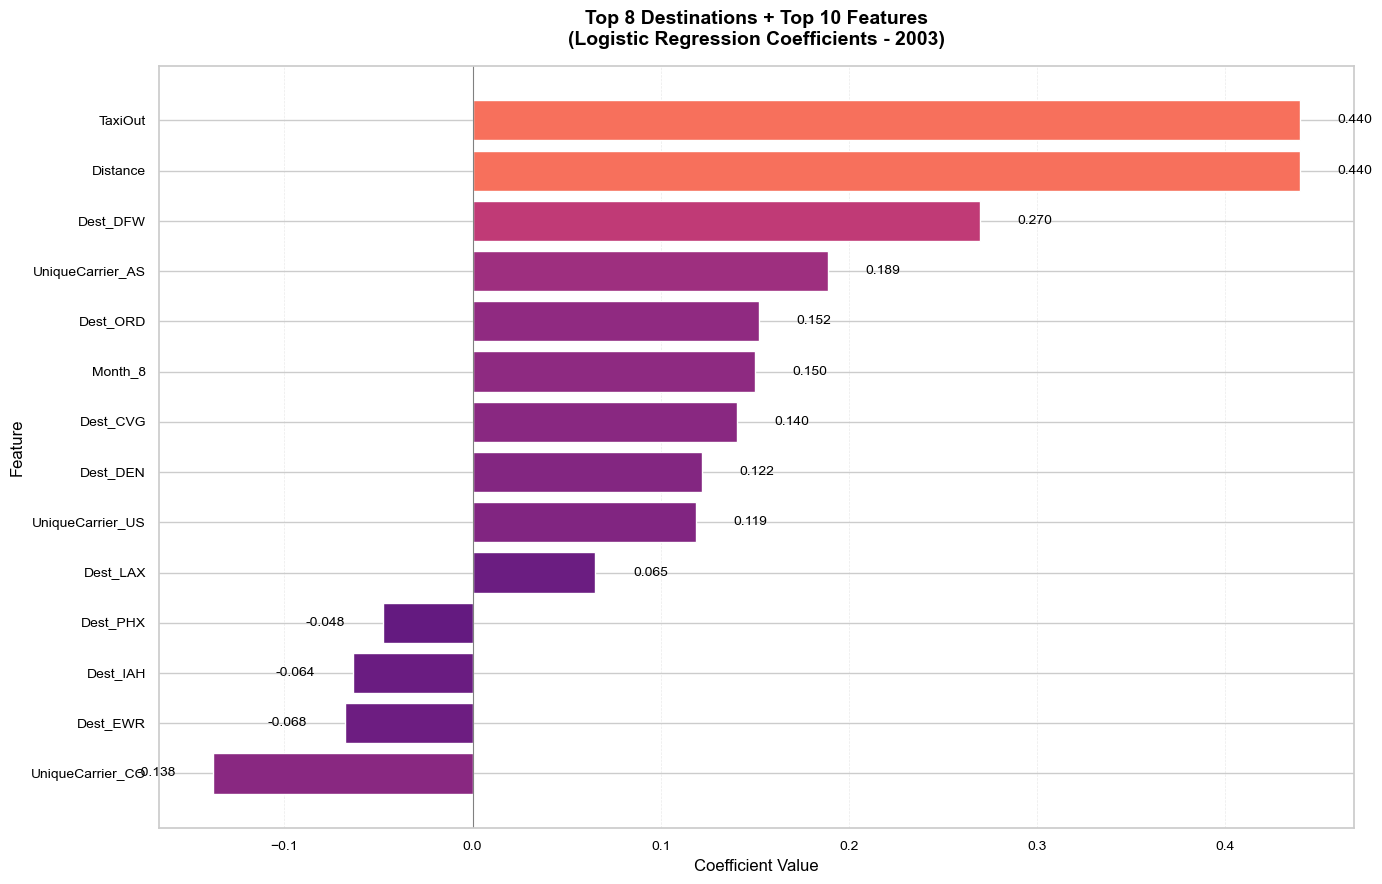

In [35]:
year_to_plot = 2003
year_coefs = coef_df.loc[year_to_plot]

dest_features = [f for f in year_coefs.index if f.startswith('Dest_')]
top8_dest = year_coefs[dest_features].abs().sort_values(ascending=False).head(8).index
top8_dest_values = year_coefs[top8_dest]

top10_overall = year_coefs.abs().sort_values(ascending=False).head(10).index
top10_other_values = year_coefs[top10_overall]

combined_features = pd.concat([top8_dest_values, top10_other_values])
combined_features = combined_features[~combined_features.index.duplicated(keep='first')]
combined_features = combined_features.sort_values()

norm = mcolors.Normalize(vmin=combined_features.abs().min(), vmax=combined_features.abs().max())
colors = [cmap(0.3 + 0.4 * norm(abs(val))) for val in combined_features]

plt.figure(figsize=(14, 9))
bars = plt.barh(combined_features.index, combined_features.values, color=colors)

for bar in bars:
    width = bar.get_width()
    label_x = width + 0.02 if width >= 0 else width - 0.02
    ha = 'left' if width >= 0 else 'right'
    plt.text(label_x, bar.get_y() + bar.get_height() / 2, f'{width:.3f}', va='center', ha=ha, fontsize=10, color='black')

plt.title('Top 8 Destinations + Top 10 Features\n(Logistic Regression Coefficients - 2003)',
          fontsize=14, fontweight='bold', pad=15, color='black')
plt.xlabel('Coefficient Value', fontsize=12, color='black')
plt.ylabel('Feature', fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.4)
plt.axvline(x=0, color='gray', linewidth=0.8)
plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.show()

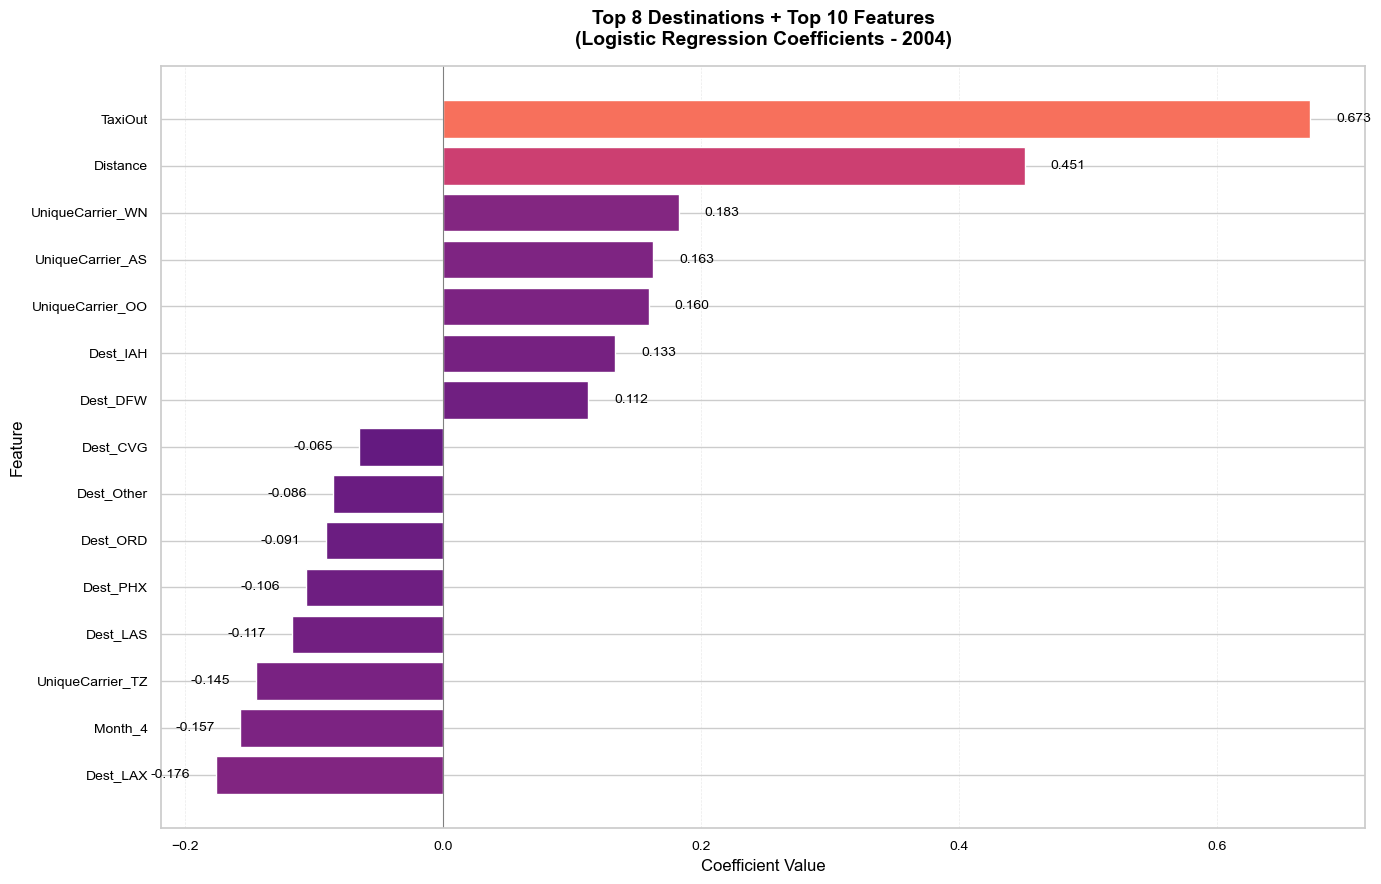

In [36]:
year_to_plot = 2004
year_coefs = coef_df.loc[year_to_plot]

dest_features = [f for f in year_coefs.index if f.startswith('Dest_')]
top8_dest = year_coefs[dest_features].abs().sort_values(ascending=False).head(8).index
top8_dest_values = year_coefs[top8_dest]

top10_overall = year_coefs.abs().sort_values(ascending=False).head(10).index
top10_other_values = year_coefs[top10_overall]

combined_features = pd.concat([top8_dest_values, top10_other_values])
combined_features = combined_features[~combined_features.index.duplicated(keep='first')]
combined_features = combined_features.sort_values()

norm = mcolors.Normalize(vmin=combined_features.abs().min(), vmax=combined_features.abs().max())
colors = [cmap(0.3 + 0.4 * norm(abs(val))) for val in combined_features]

plt.figure(figsize=(14, 9))
bars = plt.barh(combined_features.index, combined_features.values, color=colors)

for bar in bars:
    width = bar.get_width()
    label_x = width + 0.02 if width >= 0 else width - 0.02
    ha = 'left' if width >= 0 else 'right'
    plt.text(label_x, bar.get_y() + bar.get_height() / 2, f'{width:.3f}', va='center', ha=ha, fontsize=10, color='black')

plt.title('Top 8 Destinations + Top 10 Features\n(Logistic Regression Coefficients - 2004)',
          fontsize=14, fontweight='bold', pad=15, color='black')
plt.xlabel('Coefficient Value', fontsize=12, color='black')
plt.ylabel('Feature', fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.4)
plt.axvline(x=0, color='gray', linewidth=0.8)
plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.show()

### Wald's Test for Feature Significance (All Years Combined)

This part checks **which types of features** (like destination, carrier, or time of day) are most useful for predicting flight diversions.

- We clean and prepare the data.
- Run a logistic regression model.
- Use **Wald's test** to see which feature groups matter most.
- The lower the p-value, the more important the feature.

The final table shows which groups (like `Origin` or `Dest`) had the biggest impact.


In [ ]:
combined_data = all_data_2C.copy()

# Limit high-cardinality categoricals
for col in ['UniqueCarrier', 'Origin', 'Dest']:
    combined_data[col] = combined_data[col].astype(str)
    top_n = combined_data[col].value_counts().nlargest(10).index
    combined_data[col] = combined_data[col].where(combined_data[col].isin(top_n), other='Other')

# Check unique values
print("\nUnique value count check:")
for col in ['ArrTime_Category', 'DepTime_Category', 'UniqueCarrier', 'Origin', 'Dest']:
    print(f"{col}: {combined_data[col].nunique()}")

# Define variables
walds_variable = ['Month', 'DayofMonth', 'ArrTime_Category', 'DepTime_Category', 'Distance',
                  'UniqueCarrier', 'Origin', 'Dest']

# Drop missing
combined_data = combined_data.dropna(subset=walds_variable + ['Diverted'])

# Separate categoricals and numerics
categorical_vars = ['ArrTime_Category', 'DepTime_Category', 'UniqueCarrier', 'Origin', 'Dest']
numeric_vars = [col for col in walds_variable if col not in categorical_vars]

# Convert categoricals properly
for col in categorical_vars:
    combined_data[col] = combined_data[col].astype('category')

# One-hot encode
X_cat = pd.get_dummies(combined_data[categorical_vars], drop_first=True)
X = pd.concat([combined_data[numeric_vars], X_cat], axis=1).astype(float)

# Target
y = combined_data['Diverted'].astype(float)

# Add intercept
X = sm.add_constant(X)

# Fit model
model = sm.Logit(y, X)
result = model.fit()

# Wald's test
wald_test = result.wald_test_terms(scalar=True)
wald_df = wald_test.table.copy()
wald_df.columns = ['chi2', 'p-value', 'df constraint']

# Grouping logic
def get_group(col):
    if col == 'const':
        return 'Intercept'
    return col.split('_')[0] if '_' in col else col

wald_df['group'] = wald_df.index.map(get_group)

# Summary
summary = (
    wald_df.groupby('group')
    .agg({'chi2': 'sum', 'p-value': 'min'})
    .sort_values('p-value')
)

print("\n Grouped Wald's Test Summary")
print(summary)


Unique value count check:
ArrTime_Category: 4
DepTime_Category: 4
UniqueCarrier: 11
Origin: 10
Dest: 10
Optimization terminated successfully.
         Current function value: 0.014166
         Iterations 11

 Grouped Wald's Test Summary (one row per original column):
                       chi2        p-value
group                                     
Distance        6494.885853   0.000000e+00
Intercept      31647.118286   0.000000e+00
Dest            1380.148958  2.074144e-151
ArrTime          309.410034   7.875585e-45
Origin           204.363543   3.710566e-39
DepTime          175.061190   1.898892e-32
UniqueCarrier    379.253436   8.317114e-32
DayofMonth        15.338142   8.988330e-05
Month              0.421026   5.164257e-01


##### delete CSV Created for part 2c


In [ ]:
CSVs = [f"{year}_Q2C.csv" for year in range(2000, 2005)]
directory_path = os.getcwd()

print("Files to be deleted:")
for CSV in CSVs:
    print(CSV)

confirmation = input("Do you want to delete the following files? (Y/N): ").lower()

while confirmation != 'y':
    if confirmation == 'n':
        print("Deletion cancelled. Run the code again to delete. Thank you.")
        break
    else:
        confirmation = input("Invalid input. Please enter 'Y' or 'N': ").lower()

if confirmation == 'y':
    for CSV in CSVs:
        CSV_path = os.path.join(directory_path, CSV)
        try:
            os.remove(CSV_path)
            print(f"Deleted: {CSV}")
        except FileNotFoundError:
            print(f"File not found: {CSV}")

    print("Task completed! Cleaned files deleted.")

Files to be deleted:
2000_Q2C.csv
2001_Q2C.csv
2002_Q2C.csv
2003_Q2C.csv
2004_Q2C.csv
Deleted: 2000_Q2C.csv
Deleted: 2001_Q2C.csv
Deleted: 2002_Q2C.csv
Deleted: 2003_Q2C.csv
Deleted: 2004_Q2C.csv
Task completed! Cleaned files deleted.
